## Step 0: Initialize model

In [1]:
from ccai9012 import svi_utils

In [2]:
# Load the pre-trained SegFormer-B5 model and image processor
from transformers import AutoImageProcessor, AutoModelForSemanticSegmentation

model_id = "nvidia/segformer-b5-finetuned-cityscapes-1024-1024"
model = AutoModelForSemanticSegmentation.from_pretrained(model_id, cache_dir="../../models")
processor = AutoImageProcessor.from_pretrained(model_id)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


## Step 1: Testing with single street view image

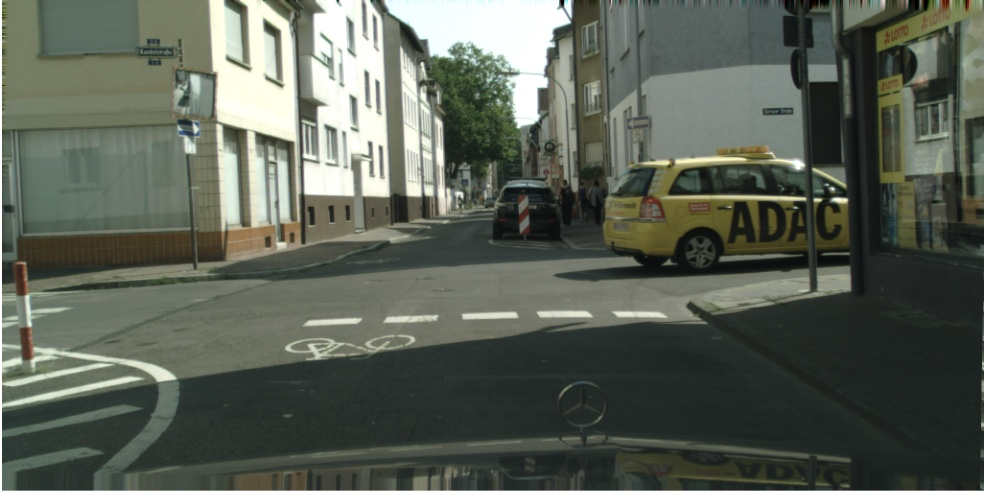

In [3]:
from PIL import Image

image = Image.open("sample.jpeg")
image

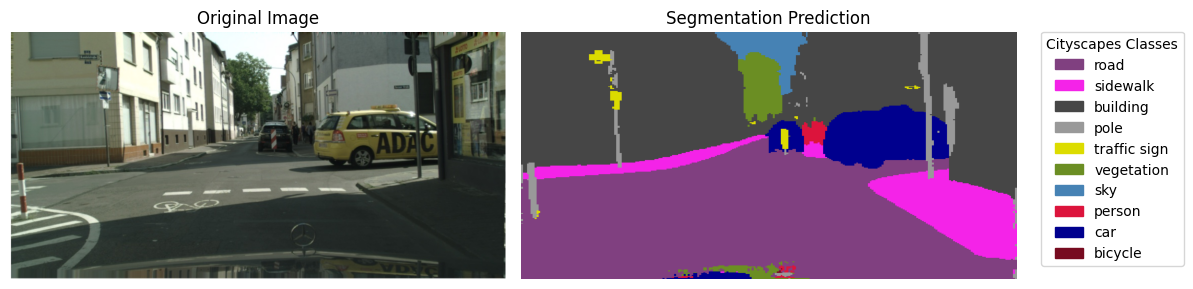

In [4]:
# Predict segmentation and convert to numpy
mask_np = svi_utils.segment_and_save_images(image, processor, model)

# Visualize the original image and predicted segmentation results
svi_utils.visualize_segmentation_pair(image, mask_np, show_legend=True)

## Step 2: Pulling SVI of the given region from Google Map through API

In [5]:
# Initialize downloader for Google Map API
downloader = svi_utils.GoogleSVIDownloader()

Enter your Google Map API key:  ········


In [6]:
# Check if Street View Image (SVI) is available at a specific location

lat, lon = 37.7749, -122.4194  # Example: San Francisco coordinates
available = downloader.is_svi_available(lat, lon)
print(f"SVI available at {lat}, {lon}? {available}")

SVI available at 37.7749, -122.4194? False


In [7]:
# Download a single Street View Image
image = downloader.download_svi(lat, lon, heading=0, pitch=0, fov=90, size="640x640", save=True)
if image:
    display(image)  # Display the image

Failed to download SVI at (37.7749, -122.4194), status code: 403


In [12]:
# Batch download SVI images over the grid region
svi_images = downloader.download_grid_svis(lat_start=37.7749, lon_start=-122.4194,
                                           rows=2, cols=3, delta=0.001,
                                           heading=0, pitch=0, fov=90, size="640x640")

Saved SVI: images/lat37.774900_lon-122.419400_hdg0.jpg
Saved SVI: images/lat37.774900_lon-122.418400_hdg0.jpg
Saved SVI: images/lat37.774900_lon-122.417400_hdg0.jpg
Saved SVI: images/lat37.775900_lon-122.419400_hdg0.jpg
Saved SVI: images/lat37.775900_lon-122.418400_hdg0.jpg
Saved SVI: images/lat37.775900_lon-122.417400_hdg0.jpg


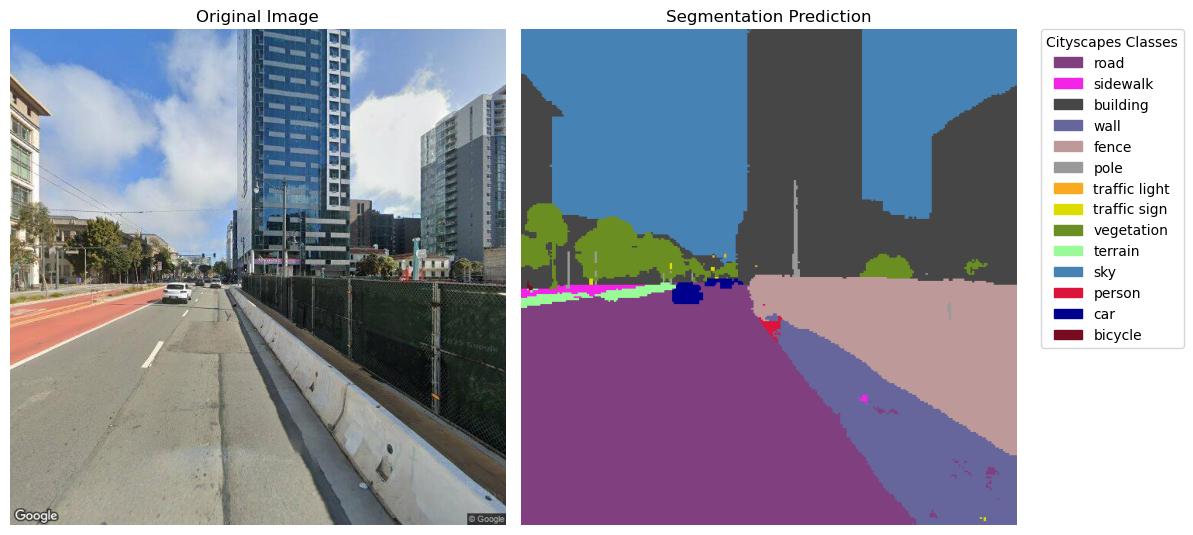

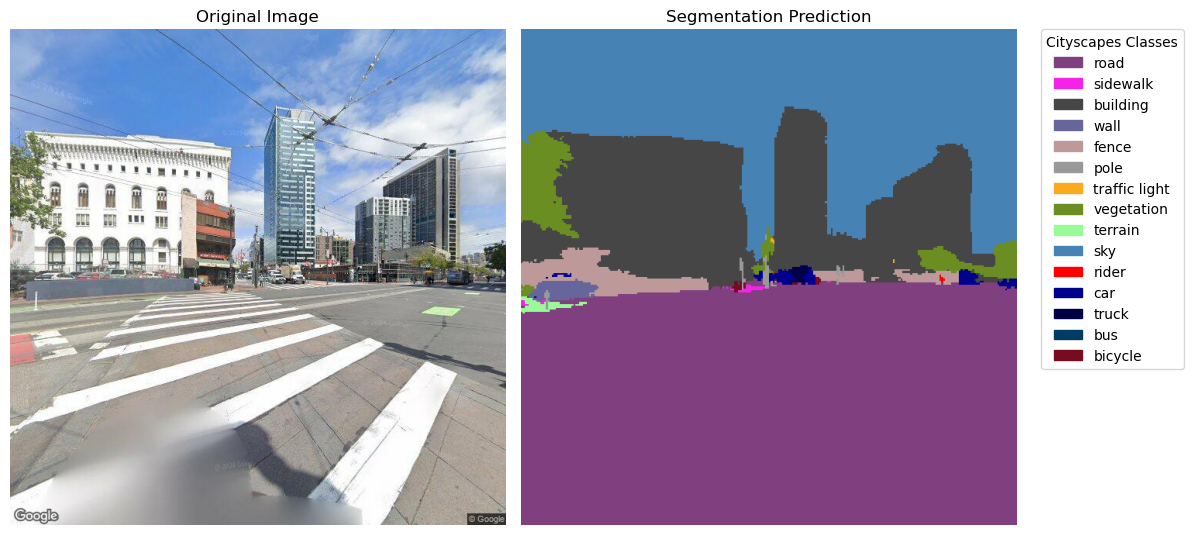

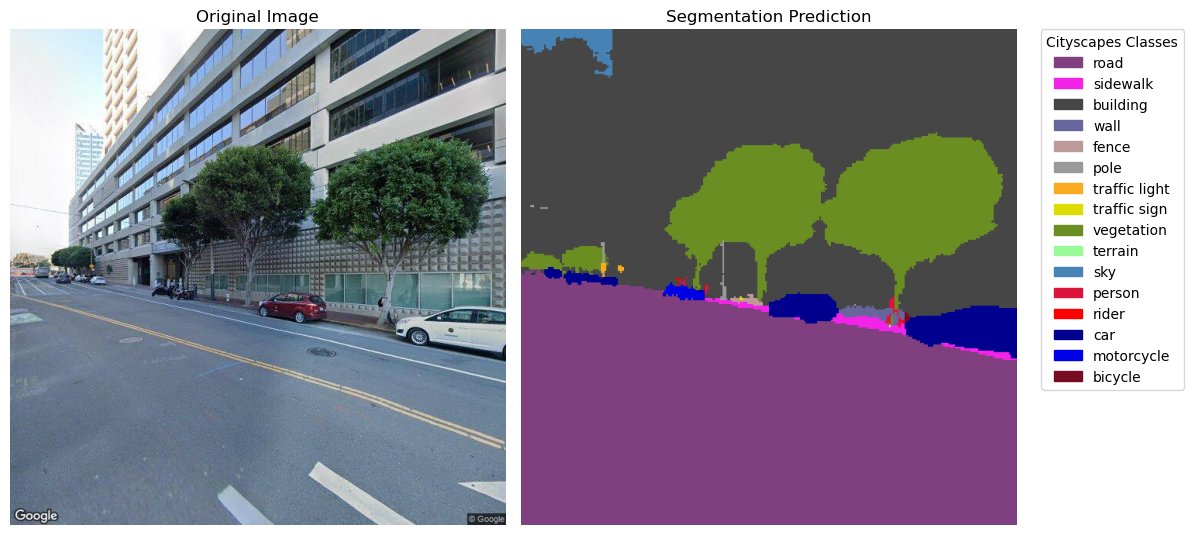

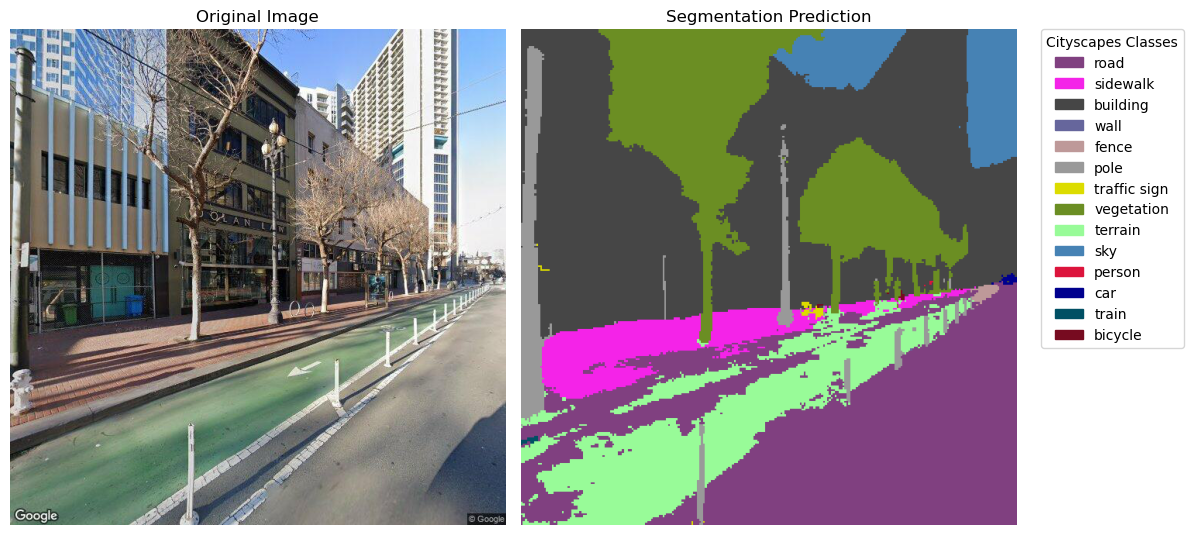

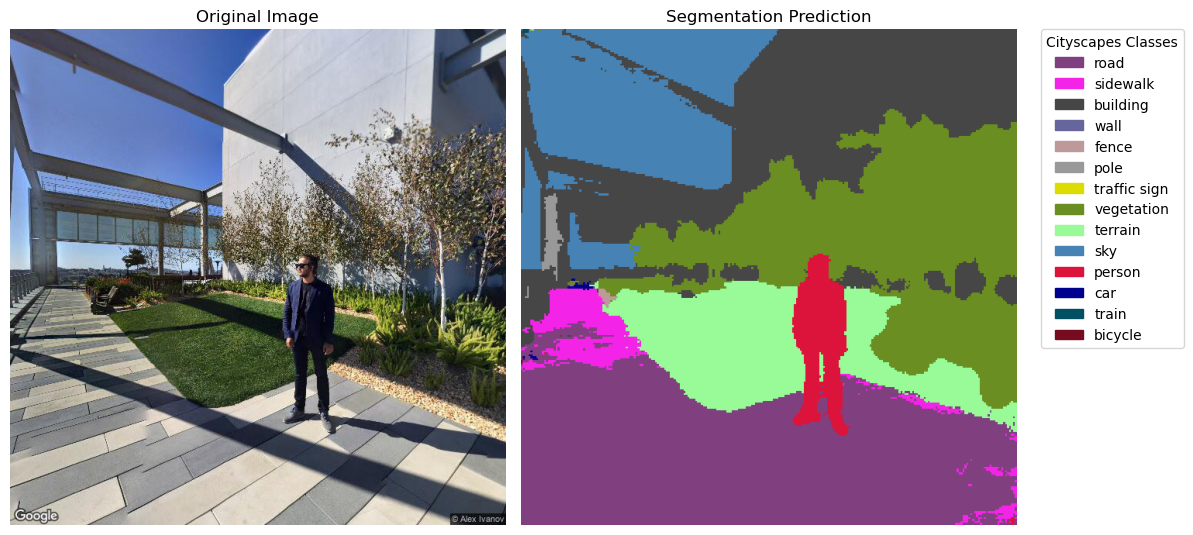

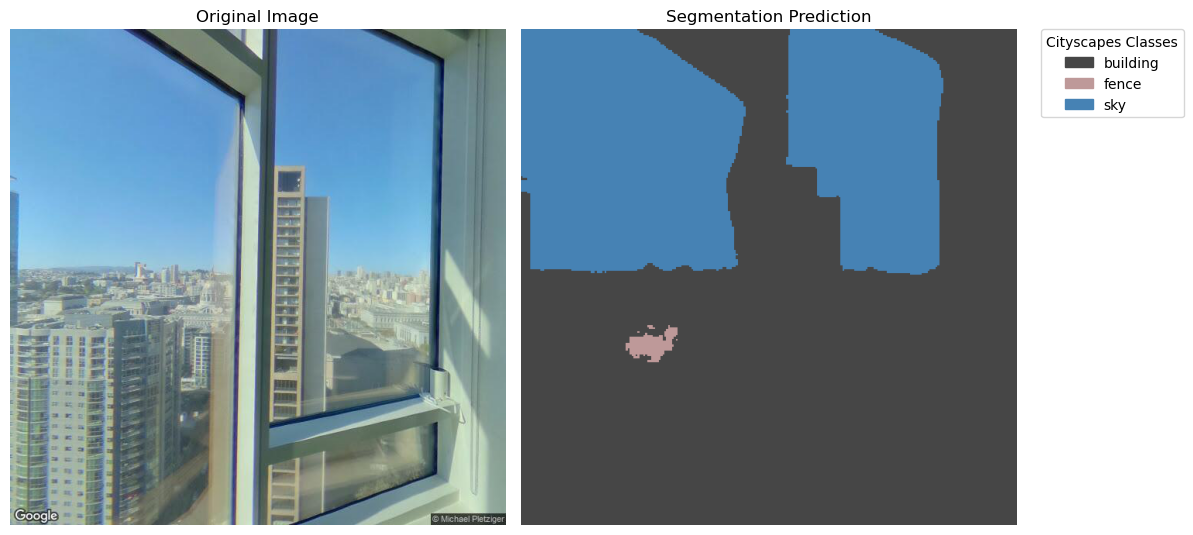

In [14]:
# Segment the downloaded SVIs and visualize
svi_utils.batch_segment_and_visualize(
    save_dir="images",
    output_dir="segmentations",
    processor=processor,
    model=model,
    max_visualize=10,
)